<a href="https://colab.research.google.com/github/sathish6097/Atm-function/blob/main/spd_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


data = pd.read_csv("/content/drive/MyDrive/merged_output_ham.txt", sep="\t",names = ["message","label"])
data["label"]=0
data1 = pd.read_csv("/content/drive/MyDrive/merged_output_spam.txt", sep="\t",names = ["message","label"])
data1["label"]=1
final_data = pd.concat([data1,data],axis = 0,ignore_index=True)
print(final_data)

                                                  message  label
0       Subject: fw : this is the solution i mentioned...      1
1                                                      oo      1
2                                             thank you ,      1
3       your email address was obtained from a purchas...      1
4       reference # 2020 mid = 3300 . if you wish to u...      1
...                                                   ...    ...
784147                           enron broadband services      0
784148                        1400 smith street , eb 4505      0
784149                                 houston , tx 77002      0
784150                          713 - 853 - 6724 - direct      0
784151                             713 - 853 - 9469 - fax      0

[784152 rows x 2 columns]


<ipython-input-4-f5a23763ef54>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


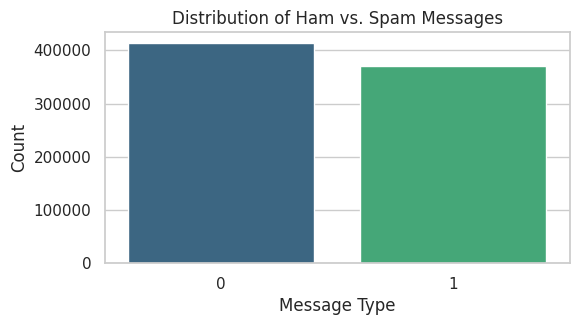

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each label
label_counts = final_data["label"].value_counts()

# Plot
plt.figure(figsize=(6, 3))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.title("Distribution of Ham vs. Spam Messages")
plt.show()

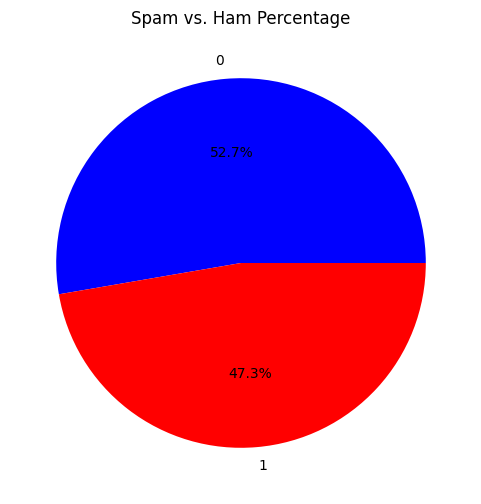

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", colors=["blue", "red"])
plt.title("Spam vs. Ham Percentage")
plt.show()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tqdm import tqdm
import time

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('all')
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

# Function to clean text
def preprocess_text(text):
    text = str(text)
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    words = word_tokenize(text)  # Tokenization
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Stemming & stopword removal
    return " ".join(words)

# Apply preprocessing
tqdm.pandas()
final_data["clean_message"] = final_data["message"].apply(preprocess_text)

# Display cleaned text
print(final_data[["message", "clean_message"]])
time.sleep(0.5)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_d

                                                  message  \
0       Subject: fw : this is the solution i mentioned...   
1                                                      oo   
2                                             thank you ,   
3       your email address was obtained from a purchas...   
4       reference # 2020 mid = 3300 . if you wish to u...   
...                                                   ...   
784147                           enron broadband services   
784148                        1400 smith street , eb 4505   
784149                                 houston , tx 77002   
784150                          713 - 853 - 6724 - direct   
784151                             713 - 853 - 9469 - fax   

                            clean_message  
0            subject fw solut mention lsc  
1                                      oo  
2                                   thank  
3       email address obtain purchas list  
4               refer mid wish unsubscrib  
...

In [ ]:
final_data.isnull()


,message,label,clean_message
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
784147,False,False,False
784148,False,False,False
784149,False,False,False
784150,False,False,False


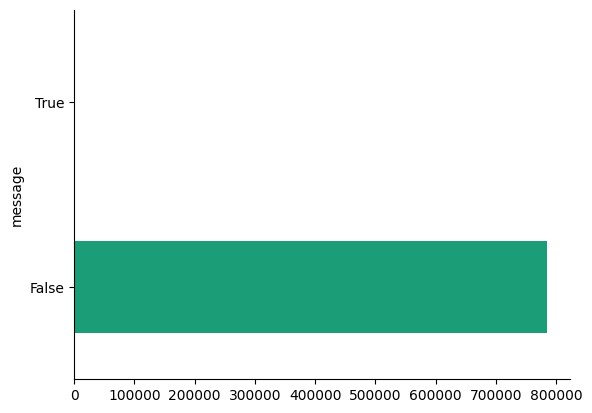

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, min_df=2)  # Use top 5000 words

final_data["clean_message"] = final_data["clean_message"].fillna("")


X = vectorizer.fit_transform(final_data["clean_message"])
y = final_data["label"].to_numpy()
# Print feature shape
print("Feature shape:", X.shape)
print("Number of Labels (y):", len(y))

Feature shape: (784152, 5000)
Number of Labels (y): 784152


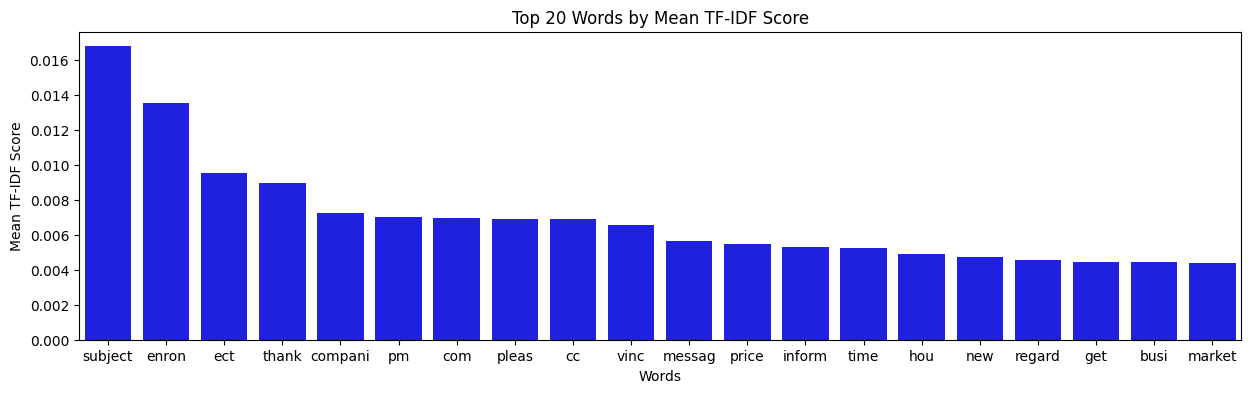

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming final_data["clean_message"] contains the preprocessed text data
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(final_data["clean_message"])
feature_array = np.array(tfidf_vectorizer.get_feature_names_out())

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.asarray(X_tfidf.mean(axis=0)).flatten()

# Get the indices of the top 20 words with the highest mean TF-IDF scores
top_indices = np.argsort(mean_tfidf_scores)[::-1][:20]

# Get the top 20 words and their corresponding mean TF-IDF scores
top_words = feature_array[top_indices]
top_scores = mean_tfidf_scores[top_indices]

# Plot the top 20 words
plt.figure(figsize=(15, 4))
sns.barplot(y=top_scores, x=top_words, color='blue')
plt.title("Top 20 Words by Mean TF-IDF Score")
plt.ylabel("Mean TF-IDF Score")
plt.xlabel("Words")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.811837500892684
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83    103303
           1       0.84      0.74      0.79     92735

    accuracy                           0.81    196038
   macro avg       0.82      0.81      0.81    196038
weighted avg       0.82      0.81      0.81    196038



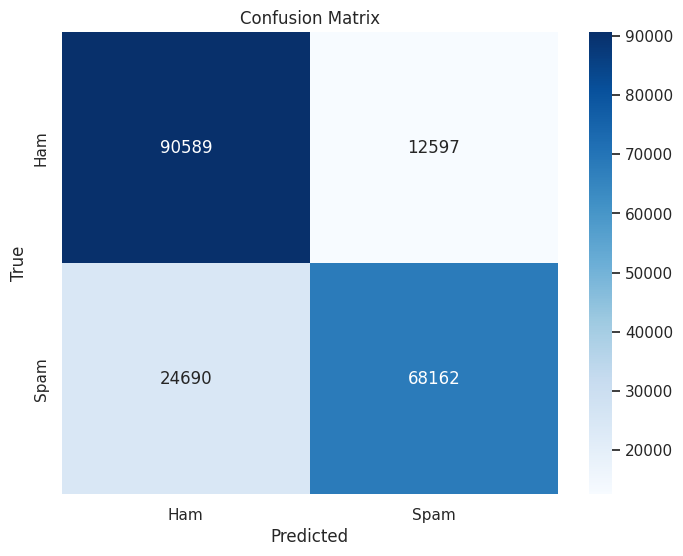

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

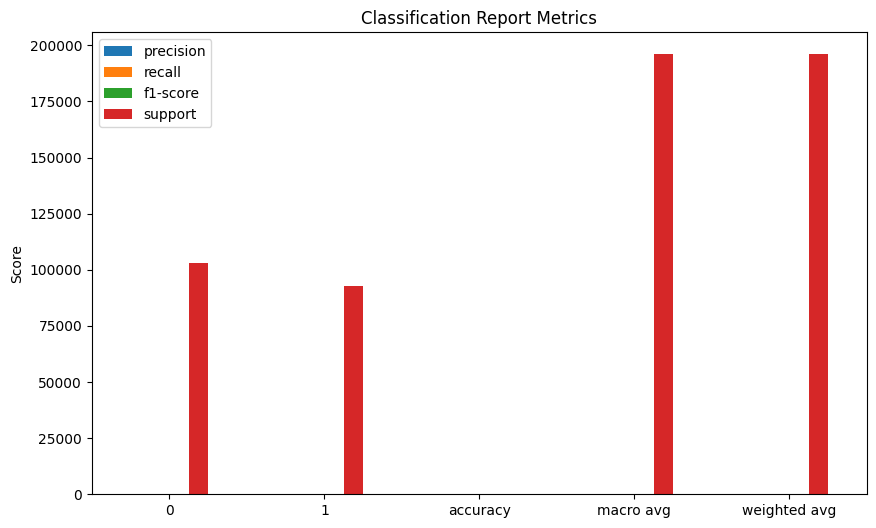

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract metrics from the classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot the metrics
df_report.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

In [ ]:
import imaplib
import email
import pandas as pd
import re

# Gmail IMAP settings
EMAIL = "rocksk2004@gmail.com"
PASSWORD = "rter fjls cckb dkhc"

# Connect to Gmail
mail = imaplib.IMAP4_SSL("imap.gmail.com")
mail.login(EMAIL, PASSWORD)
mail.select("inbox")  # Select inbox

# Search for all emails
_, data = mail.search(None, "ALL")
email_ids = data[0].split()

# List to store extracted emails
emails = []

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove special characters
    return text.strip()

# Fetch emails
for num in email_ids:
    _, msg_data = mail.fetch(num, "(RFC822)")
    raw_email = msg_data[0][1]

    # Parse email content
    msg = email.message_from_bytes(raw_email)
    subject = msg["Subject"]
    sender = msg["From"]

    # Extract email body
    body = ""
    if msg.is_multipart():
        for part in msg.walk():
            content_type = part.get_content_type()
            if "plain" in content_type:
                body = part.get_payload(decode=True).decode(errors="ignore")
                break
    else:
        body = msg.get_payload(decode=True).decode(errors="ignore")

    # Clean data
    subject = clean_text(subject) if subject else ""
    body = clean_text(body) if body else ""

    # Store in list
    emails.append([sender, subject, body])

# Convert to DataFrame
df = pd.DataFrame(emails, columns=["Sender", "Subject", "Body"])

# Save to CSV
df.to_csv("emails.csv", index=False)
print("Emails saved to emails.csv!")

# Logout from email server



Emails saved to emails.csv!


In [ ]:
import pandas as pd

def predict_spam_bulk(messages):
    results = []
    for text in messages:
        try:
            processed_text = preprocess_text(text)
            vectorized_text = vectorizer.transform([processed_text])
            prediction = model.predict(vectorized_text)
            probability = model.predict_proba(vectorized_text)[:, 1]  # Spam probability
            results.append({"text": text, "label": "Spam" if prediction[0] == 1 else "Ham", "probability": probability[0]})
        except Exception as e:
            results.append({"text": text, "label": "Error", "probability": None, "error": str(e)})

    return pd.DataFrame(results)


test_messages =  df['Body']
df_results = predict_spam_bulk(test_messages)
print(df_results)


                                                  text label  probability
0    welcome sathish your new google account gives ...  Spam     0.989643
1    youre receiving this email because were updati...  Spam     0.636238
2    get more done with google want to know the lat...  Spam     0.963681
3    on january 5 2022 were updating our terms of s...  Spam     0.711402
4    rocksk2004gmailcom on january 5 2022 were maki...  Spam     0.927371
..                                                 ...   ...          ...
361  kaggle hi sathish were excited to announce a n...  Spam     0.824521
362            the ondemand recording is now available  Spam     0.564737
363  kaggle hi sathish were excited to announce tha...  Spam     0.940979
364  hi rocksk2004gmailcom we received your request...  Spam     0.860470
365            the ondemand recording is now available  Spam     0.564737

[366 rows x 3 columns]


In [ ]:
df_results.head(100)

,text,label,probability
5,,Ham,0.472573
8,,Ham,0.472573
10,,Ham,0.472573
11,recruiters on naukricom prefer candidates with...,Ham,0.039297
13,recruiters on naukricom prefer candidates with...,Ham,0.261703
...,...,...,...
312,dear sathishkumar were thrilled to invite you ...,Ham,0.419164
316,a message from gamma 2025 gamma tech inc ...,Ham,0.332812
337,dear sathish the name sathish kumar was mentio...,Ham,0.481307
342,,Ham,0.472573


<ipython-input-25-4cb058b8cef5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_results, x='probability', y='label', inner='stick', palette='Dark2')


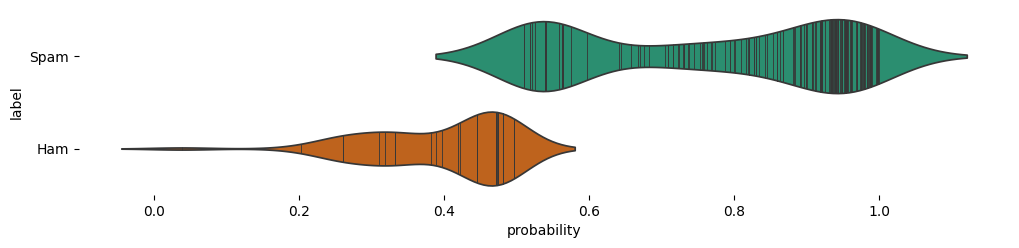

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_results['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_results, x='probability', y='label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

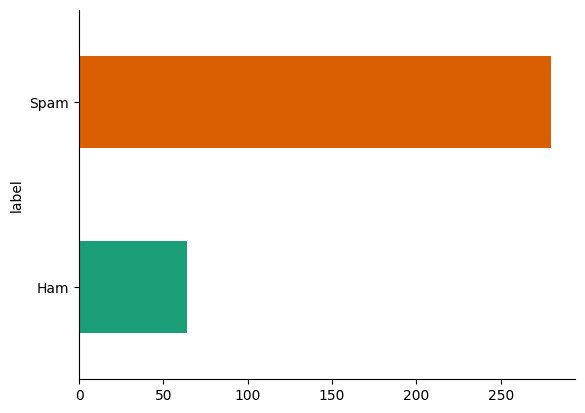

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_results.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

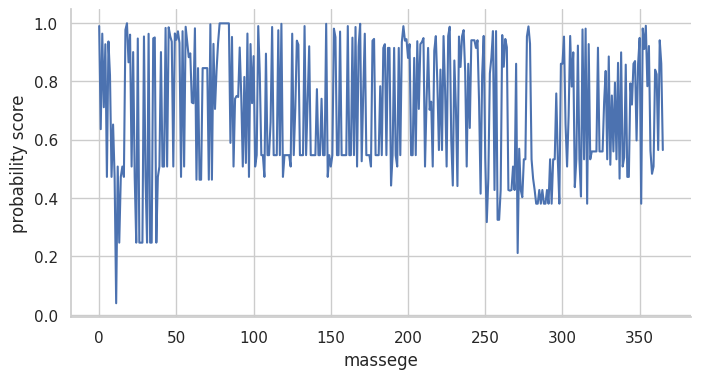

In [ ]:
from matplotlib import pyplot as plt
df_results['probability'].plot(kind='line', figsize=(8, 4), title='',xlabel="massege",ylabel="probability score")
plt.gca().spines[['top', 'right']].set_visible(False)

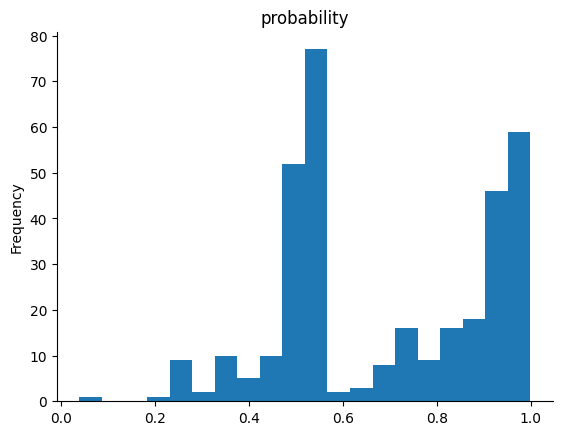

In [ ]:
from matplotlib import pyplot as plt
df_results['probability'].plot(kind='hist', bins=20, title='probability')
plt.gca().spines[['top', 'right',]].set_visible(False)

,Body
0,welcome sathish your new google account gives ...
1,youre receiving this email because were updati...
2,get more done with google want to know the lat...
3,on january 5 2022 were updating our terms of s...
4,rocksk2004gmailcom on january 5 2022 were maki...
...,...
337,dear sathish the name sathish kumar was mentio...
338,kaggle hi sathish were excited to introduce ge...
339,top companies are hiring on naukri right now e...
340,kaggle hi sathish mobile and habitatdiverse sp...


<ipython-input-2-b67914d6d837>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


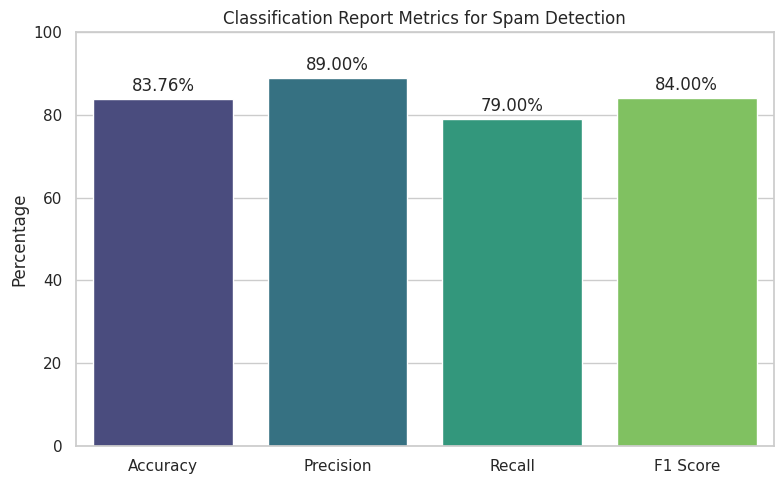

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics from your classification report
metrics = {
    'Accuracy': 83.76,
    'Precision': 89.00,
    'Recall': 79.00,
    'F1 Score': 84.00
}

# Setup for visualization
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')

# Add value labels on bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.2f}%', ha='center', va='bottom')

# Title and labels
plt.title('Classification Report Metrics for Spam Detection')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
